In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


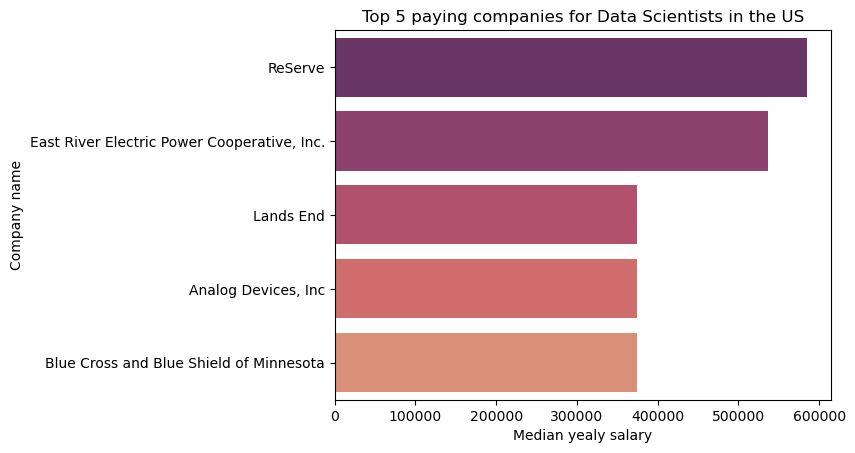

In [65]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy().dropna(subset='salary_year_avg')
top_5_salary_companies = df_DS_US.groupby(by='company_name')['salary_year_avg'].agg('median').sort_values(ascending=False).head(5).reset_index(name='median_yearly_salary')

#Plotting
sns.barplot(top_5_salary_companies, 
    x='median_yearly_salary', 
    y='company_name',
    hue='company_name',
    palette='flare_r',
    dodge=False,
    legend=False)
plt.xlabel('Median yealy salary')
plt.ylabel('Company name')
plt.title('Top 5 paying companies for Data Scientists in the US')
plt.show()

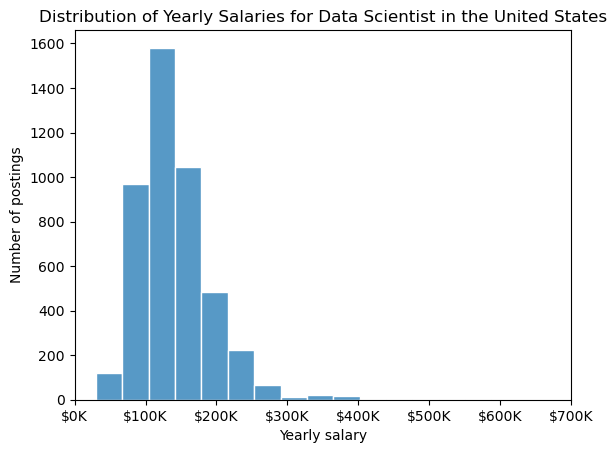

In [36]:
salary_dist = df_DS_US['salary_year_avg']

#Plotting
sns.histplot(salary_dist, bins=25, kde=False, edgecolor='white')

#Fixing x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}K'))
plt.xlim(0, 700_000)

#adding labels
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly salary')
plt.ylabel('Number of postings')
plt.show()

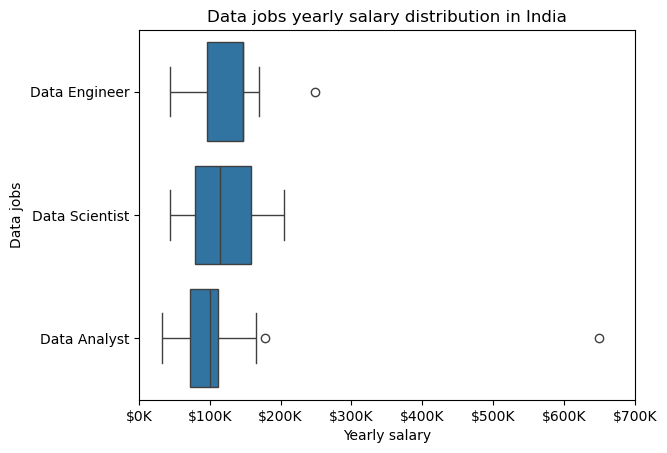

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_IN = df[(df['job_country'] == 'India') & df['job_title_short'].isin(job_titles)].dropna(subset='salary_year_avg').copy()

sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')

#Fixing x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}K'))
plt.xlim(0, 700_000)

#adding labels
plt.title('Data jobs yearly salary distribution in India')
plt.xlabel('Yearly salary')
plt.ylabel('Data jobs')
plt.show()

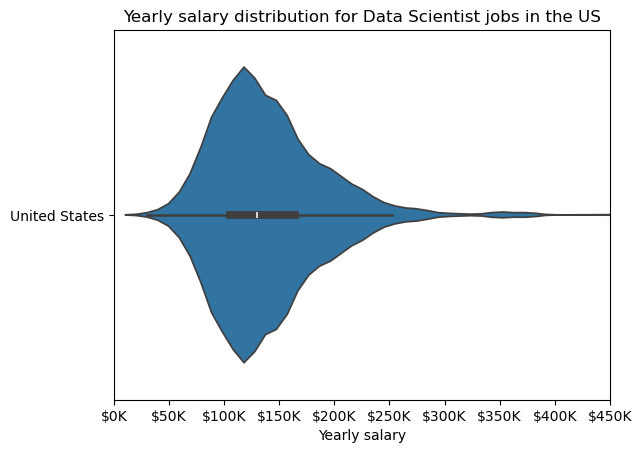

In [61]:
sns.violinplot(data=df_DS_US, x='salary_year_avg', y='job_country')

#Fixing x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}K'))
plt.xlim(0, 450_000)

#adding labels
plt.title('Yearly salary distribution for Data Scientist jobs in the US')
plt.xlabel('Yearly salary')
plt.ylabel('')
plt.show()

## Comparing it to a Boxplot

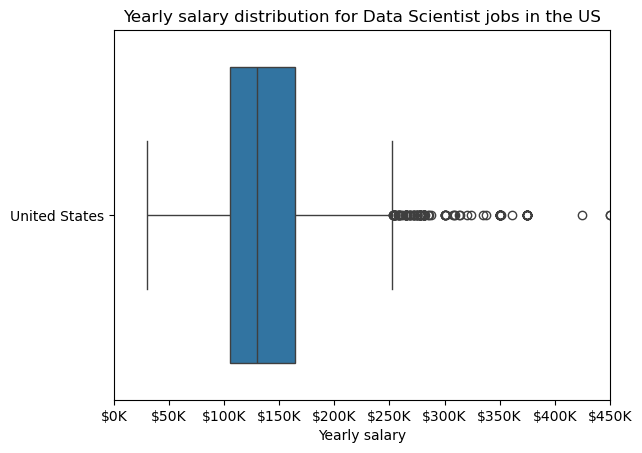

In [62]:
sns.boxplot(data=df_DS_US, x='salary_year_avg', y='job_country')

#Fixing x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}K'))
plt.xlim(0, 450_000)

#adding labels
plt.title('Yearly salary distribution for Data Scientist jobs in the US')
plt.xlabel('Yearly salary')
plt.ylabel('')
plt.show()